<a href="https://colab.research.google.com/github/olsenme/MLIntro/blob/master/Housing_Price_Prediction_using_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#Mounting Google Drive
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


# Problem Description
- We are asked to predict the house_price_of_unit_area given various key attributes:
  - Date
  - House Age etc.
- So house_price_of_unit_area is our target variable and rest of the variables are our predictor variables. Hence, its a supervised regression problem
- In this notebook we will build a regression model to solve this using Linear Regression model from scikit learn library

## Table of contents
1. Data Loading
2. Data Exploration
3. Univariate Analysis and Outlier Treatment
4. Correlation
4. Feature Engineering
5. Linear Regression
6. L1 Regression(Lasso)
7. L2 Regularization(Ridge)
6. Loss Function
7. Comparing Performance

## Data Loading

In [0]:
#importing required packages
import numpy as np
import pandas as pd
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn import metrics

import matplotlib.pyplot as plt
% matplotlib inline
plt.rcParams['agg.path.chunksize'] = 10000
import seaborn as sns
plt.style.use('bmh')
sns.set_style({'axes.grid':False})

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
#reading csv file into pandas dataframe
data = pd.read_csv('https://raw.githubusercontent.com/WomenWhoCode/WWCodeDataScience/master/Intro_to_MachineLearning/data/HousingPricePrediction/real_estate.csv')

> Note : We will do the train test split after preprocessing and feature engineering so that the changes are consistent in both train and test dataset


## Data Exploration
  - Investigating the number of features, their datatype, their meaning and statistics.

In [0]:
#list first five rows
print('Preview data:')
display(data.head())

Preview data:


,No,transaction_date,house_age,distance_to_the_nearest_MRT_station,number_of_convenience_stores,latitude,longitude,house_price_of_unit_area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [0]:
#since no is a unique id for each row, we can delete it
data.drop(["No"], axis = 1, inplace = True)

In [0]:
# check datatypes
print('Check datatypes:')
display(data.dtypes)

Check datatypes:


transaction_date                       float64
house_age                              float64
distance_to_the_nearest_MRT_station    float64
number_of_convenience_stores             int64
latitude                               float64
longitude                              float64
house_price_of_unit_area               float64
dtype: object

In [0]:
# check statistics of the features
data.describe()

,transaction_date,house_age,distance_to_the_nearest_MRT_station,number_of_convenience_stores,latitude,longitude,house_price_of_unit_area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,2013.148971,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,0.281967,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,2012.917000,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,2013.417000,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


## Univariate Analysis and Outlier Treatment



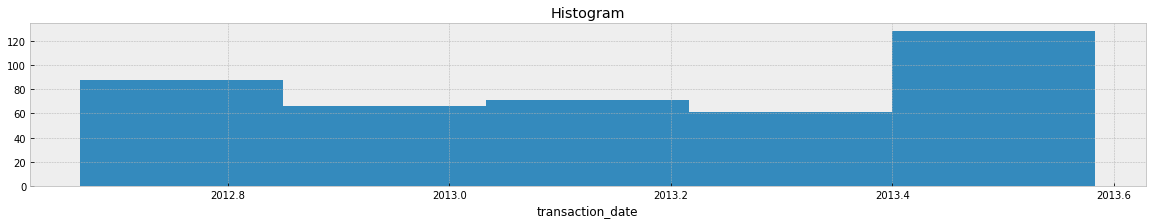

In [0]:
# plot histogram of transaction date
data.transaction_date.hist(bins=5, figsize=(20,3))
plt.xlabel('transaction_date')
plt.title('Histogram');

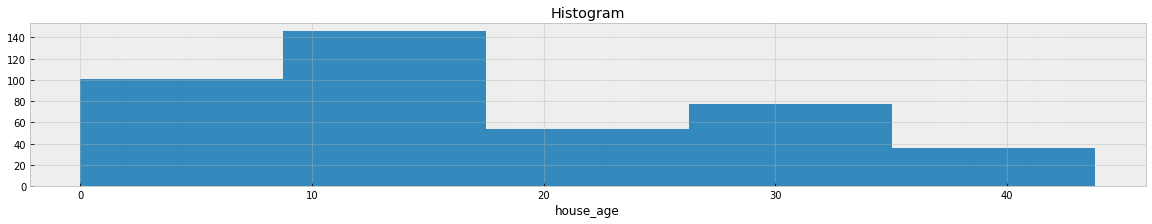

In [0]:
# plot histogram of house_age
data.house_age.hist(bins=5, figsize=(20,3))
plt.xlabel('house_age')
plt.title('Histogram');

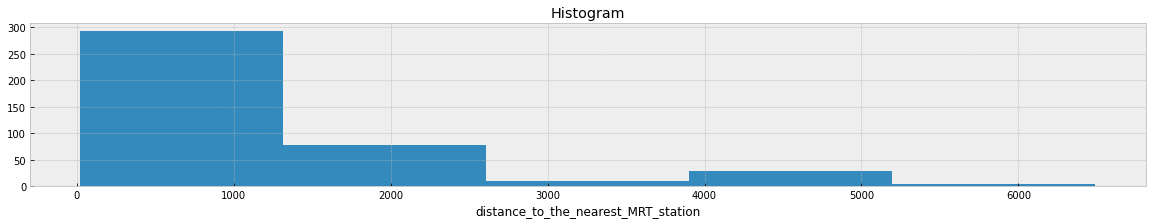

In [0]:
# plot histogram of distance_to_the_nearest_MRT_station
data.distance_to_the_nearest_MRT_station.hist(bins=5, figsize=(20,3))
plt.xlabel('distance_to_the_nearest_MRT_station')
plt.title('Histogram');

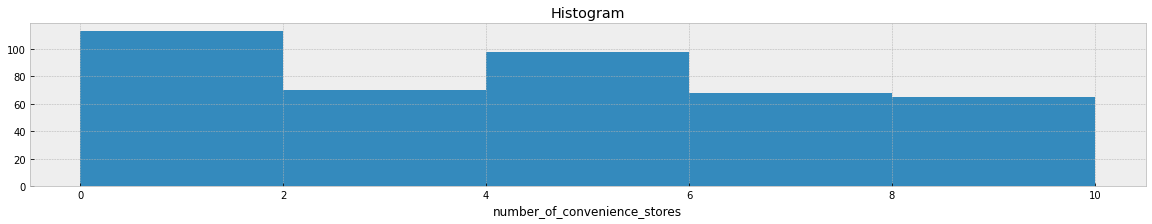

In [0]:
# plot histogram of distance_to_the_nearest_MRT_station
data.number_of_convenience_stores.hist(bins=5, figsize=(20,3))
plt.xlabel('number_of_convenience_stores')
plt.title('Histogram');

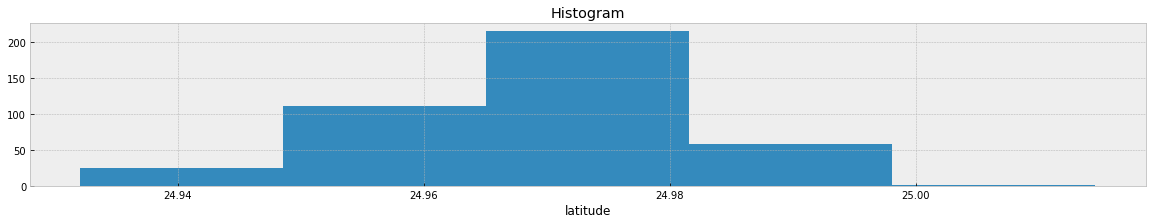

In [0]:
# plot histogram of latitude
data.latitude.hist(bins=5, figsize=(20,3))
plt.xlabel('latitude')
plt.title('Histogram');

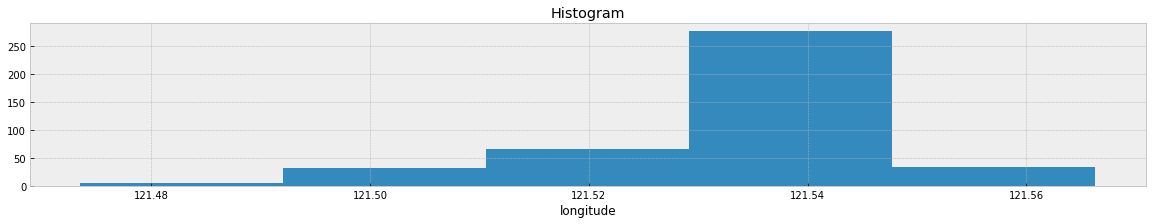

In [0]:
# plot histogram of longitude
data.longitude.hist(bins=5, figsize=(20,3))
plt.xlabel('longitude')
plt.title('Histogram');

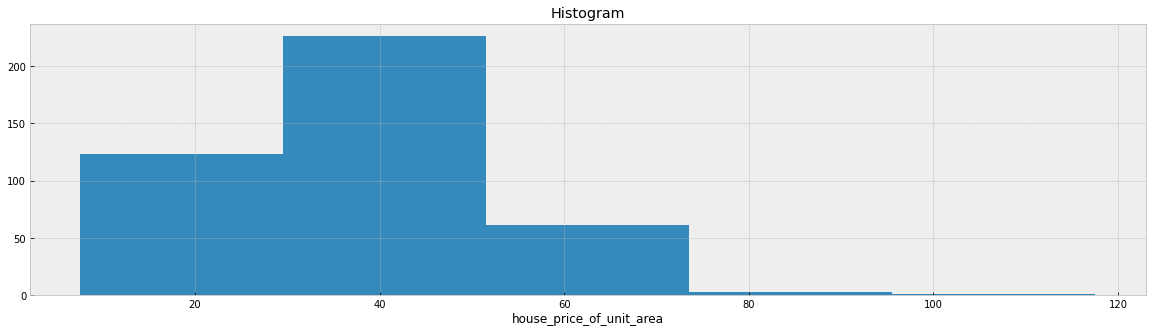

In [0]:
# plot histogram of house_price_of_unit_area
data.house_price_of_unit_area.hist(bins=5, figsize=(20,5))
plt.xlabel('house_price_of_unit_area')
plt.title('Histogram');

In [0]:
print('No of Datapoints with Price > 100: %d' % len(data[data.house_price_of_unit_area>100]))

No of Datapoints with Price > 100: 1


In [0]:
print('No of Datapoints with Price > 70: %d' % len(data[data.house_price_of_unit_area>70]))

No of Datapoints with Price > 70: 6




> Since the distribution of data for house_price_of_unit_area above 70 is not normal, these data points can skew the entire dataset and lead to overfitting. Hence we remove these outliers from our dataset.



In [0]:
# we remove these outliers from our dataset
print('Old size: %d' % len(data))
data = data[data.house_price_of_unit_area<=70]
print('New size: %d' % len(data))

Old size: 414
New size: 408


<!-- 

> - So as we can see performing univariate analysis helps us detect  and remove outliers in our dataset.
> - You can deduce other conclusions by exploring dataset.
 -->


## Correlation

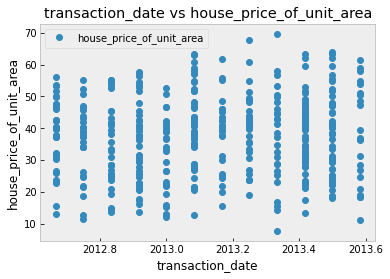

In [0]:
data.plot(x='transaction_date', y='house_price_of_unit_area', style='o')  
plt.title('transaction_date vs house_price_of_unit_area')  
plt.xlabel('transaction_date')  
plt.ylabel('house_price_of_unit_area')  
plt.show()


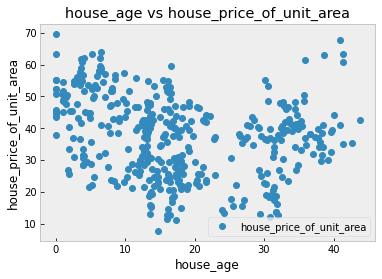

In [0]:
data.plot(x='house_age', y='house_price_of_unit_area', style='o')  
plt.title('house_age vs house_price_of_unit_area')  
plt.xlabel('house_age')  
plt.ylabel('house_price_of_unit_area')  
plt.show()

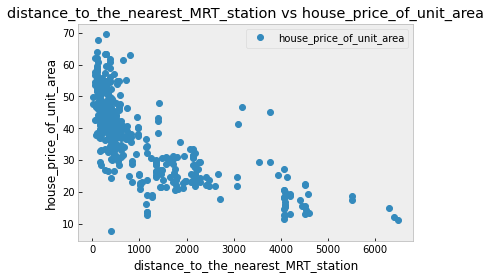

In [0]:
data.plot(x='distance_to_the_nearest_MRT_station', y='house_price_of_unit_area', style='o')  
plt.title('distance_to_the_nearest_MRT_station vs house_price_of_unit_area')  
plt.xlabel('distance_to_the_nearest_MRT_station')  
plt.ylabel('house_price_of_unit_area')  
plt.show()

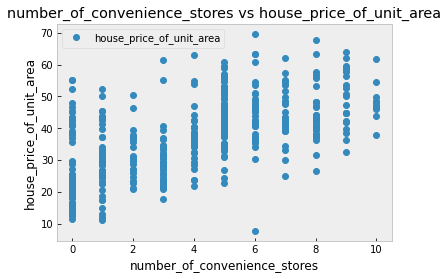

In [0]:
data.plot(x='number_of_convenience_stores', y='house_price_of_unit_area', style='o')  
plt.title('number_of_convenience_stores vs house_price_of_unit_area')  
plt.xlabel('number_of_convenience_stores')  
plt.ylabel('house_price_of_unit_area')  
plt.show()

## Feature Engineering

In [0]:
# Convert longitude and latitude into cartesian coordinates. Assume the earth as sphere not ellipsoid
R = 6371000 # Approximate mean radius of earth (in m)
 # lons and lats must be in radians
lon,lat = map(np.radians, [data.longitude, data.latitude])

# 'Single-point' Haversine formula
a = np.sin(lat/2)**2 + np.cos(lat) * np.sin(lon/2)**2
distance = 2 * R * np.arcsin(np.sqrt(a)) 

In [0]:
# Create a new variables taking absolute distance of longitude and latitude and dropping longitude and latitude
data['distance'] = distance
data.drop(['latitude', 'longitude'], axis = 1, inplace = True)

## Linear Regression

In [0]:
# split data into train test set into train and test in 70:30 ratio
y = data["house_price_of_unit_area"]
X = data.drop(["house_price_of_unit_area"], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 42)

In [0]:
X_train.dtypes

transaction_date                       float64
house_age                              float64
distance_to_the_nearest_MRT_station    float64
number_of_convenience_stores             int64
distance                               float64
dtype: object

In [0]:
y_train.dtypes

dtype('float64')

In [0]:
# Train and predict using linear regression
linear_reg = LinearRegression()
# Train with the train dataset
linear_reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
#
coeff_df = pd.DataFrame(linear_reg.coef_, X_train.columns, columns=['Coefficient'])  
coeff_df

,Coefficient
transaction_date,4.634563
house_age,-0.312347
distance_to_the_nearest_MRT_station,-0.005302
number_of_convenience_stores,1.575691
distance,-0.000622


In [0]:
intercept_df = pd.Series(linear_reg.intercept_)
intercept_df

0   -1111.504885
dtype: float64

In [0]:
# Make prediction
y_pred = linear_reg.predict(X_test)

## L1 Regression(Lasso)

In [0]:
lassoreg = Lasso(alpha=0.001, normalize=True)
lassoreg.fit(X_train, y_train)

Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=True, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [0]:
coeff_df_L1 = pd.DataFrame(lassoreg.coef_, X_train.columns, columns=['Coefficient'])  
coeff_df_L1

,Coefficient
transaction_date,4.565056
house_age,-0.310760
distance_to_the_nearest_MRT_station,-0.005253
number_of_convenience_stores,1.575441
distance,-0.000579


In [0]:
intercept_df_L1 = pd.Series(lassoreg.intercept_)
intercept_df_L1

0   -1537.471294
dtype: float64

In [0]:
# Make prediction
y_pred_L1 = lassoreg.predict(X_test)

## L2 Regularization(Ridge)

In [0]:
ridgereg = Ridge(alpha=0, normalize=True)
ridgereg.fit(X_train, y_train)

Ridge(alpha=0, copy_X=True, fit_intercept=True, max_iter=None, normalize=True,
      random_state=None, solver='auto', tol=0.001)

In [0]:
coeff_df_L2 = pd.DataFrame(ridgereg.coef_, X_train.columns, columns=['Coefficient'])  
coeff_df_L2

,Coefficient
transaction_date,4.634563
house_age,-0.312347
distance_to_the_nearest_MRT_station,-0.005302
number_of_convenience_stores,1.575691
distance,-0.000622


In [0]:
intercept_df_L2 = pd.Series(ridgereg.intercept_)
intercept_df_L2

0   -1111.504885
dtype: float64

In [0]:
# Make prediction
y_pred_L2 = ridgereg.predict(X_test)

## Loss Funtion
- To evaluate performance of the model and optimize it

### Linear Regression

In [0]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 6.838291270946759
Mean Squared Error: 82.39890452544708
Root Mean Squared Error: 9.077384233657131


### L1 Regression

In [0]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_L1))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_L1))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_L1)))

Mean Absolute Error: 6.835623418600706
Mean Squared Error: 82.35315158508833
Root Mean Squared Error: 9.074863722673102


### L2 Regression

In [0]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_L2))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_L2))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_L2)))

Mean Absolute Error: 6.8382912709467965
Mean Squared Error: 82.39890452545019
Root Mean Squared Error: 9.077384233657304


In [0]:
df = pd.DataFrame({'Actual': y_test, 'Linear Regression': y_pred, })
df.head(25)

,Actual,Linear Regression
71,40.8,31.384539
222,48.5,47.453642
262,53.0,41.478709
34,55.1,44.558552
43,34.1,35.440352
78,29.8,28.872967
139,42.5,40.259296
340,42.9,30.594421
249,15.0,5.950216
271,26.5,44.478724


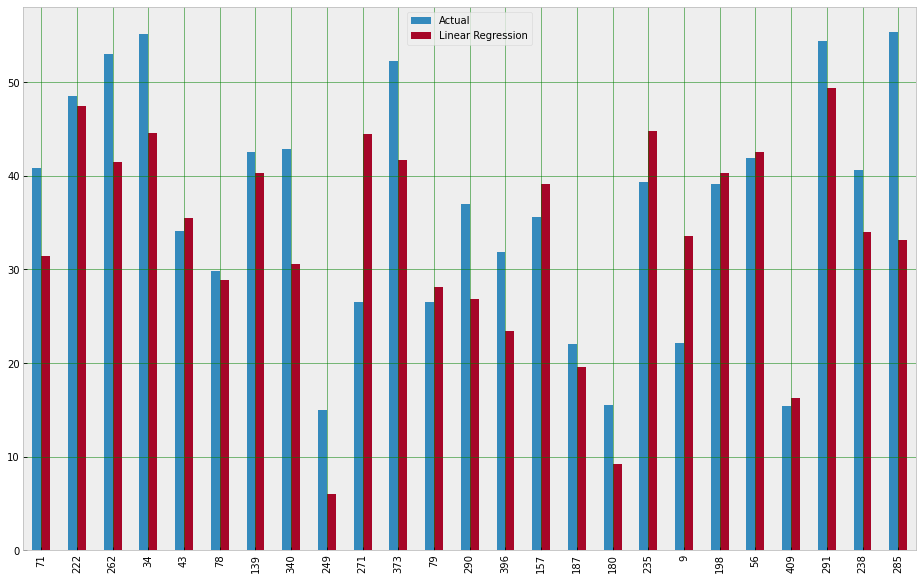

In [0]:
df1 = df.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

## Comparing Performance
- Let's plot the target labels

Text(0, 0.5, 'Actual')

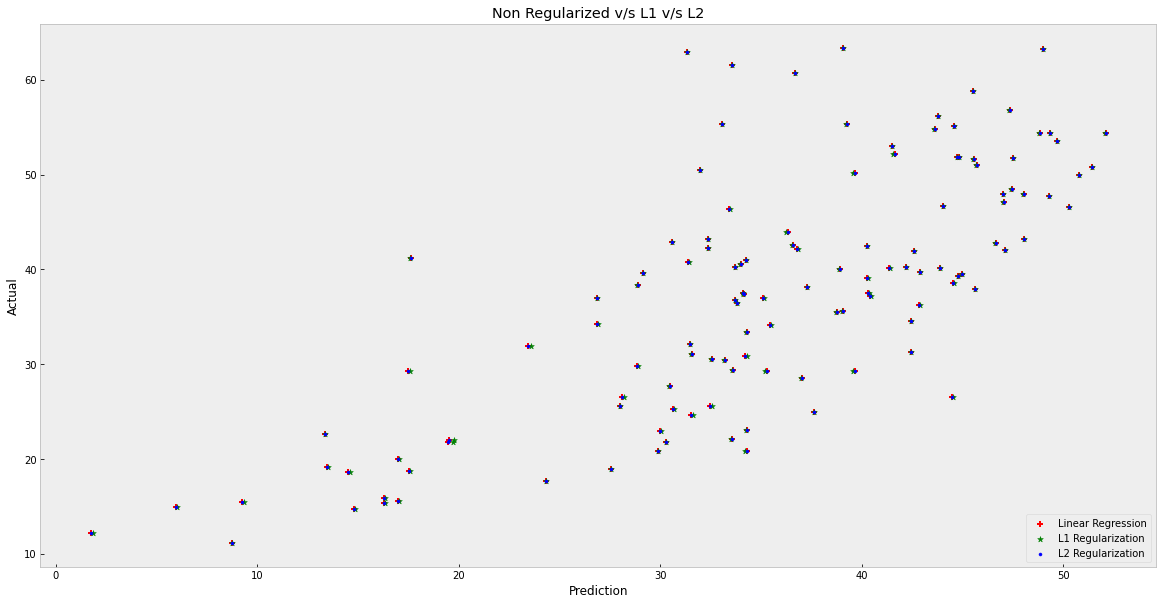

In [0]:
plt.figure(figsize = (20,10))
plt.title('Non Regularized v/s L1 v/s L2')
plt.scatter(y_pred, y_test, color = 'red', label = 'Linear Regression', marker = "+")
plt.scatter(y_pred_L1, y_test, color = 'green', label = 'L1 Regularization', marker = "*")
plt.scatter(y_pred_L2, y_test, color = 'blue', label = 'L2 Regularization', marker = ".")
plt.legend(loc = 'lower right')
plt.xlabel('Prediction')
plt.ylabel('Actual')